# Importing libraries 
## 1- NumPy (For Numeric Computation)
## 2- MatplotLib (For Data visualization)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Each data point is length, width and type (Red = 1, Blue = 0) o four flowers
# length shows the petal length of flower
# width represents the petal width of flower
# type can be one of the two categories ("Red Flowers" OR "Blue Flowers" which our Neural Network will predict)

data = [[3,    1.5,    1],
        [2,    1,      0],
        [4,    1.5,    1],
        [3,     1,     0],
        [3.5,  0.5,    1],
        [2,    0.5,    0],
       [5.5,    1,     1],
       [1,      1,     0]]

mystery_flower = [4.5,  1]

In [3]:
# We will take "index #"" as an input from user to check if our code iterates through the rows in the matrix.

i = int(input("Enter index # "))
data[i]

Enter index # 2


[4, 1.5, 1]

In [4]:
# General Network Architecture



#   O     Output layer (Predicted flower types)
#  / \    w1, w2, b
# O   O   input layer (input features length, width)

In [5]:
# Also remember these random numbers are always b/w range "-1" and "+1"

# w1 = np.random.randn()
# w2 = np.random.randn()
# b = np.random.randn()

# w1, w2, b

(-0.8228963587276693, -1.0658073389654001, 0.32340535588648683)

In [5]:
# Now we need some activation function and as our class labesls
# are binary classes. Thus, the "sigmoidal function" is the best option

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# These derivatives are aka "Gradients" or "Sigmoid Prime"
def derivatives(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [6]:
# Now lets plot this sigmoid function.
# We can do so by generating list of numbers. We used linspace to equally
# spaced steps
# Here we said we need steps b/w "-5" - "+5" with 100 subdivisions
# If the # of subdivisions are less our sigmoid curve wont be smooth
# but if we use greater # of subdivisions our sigmoid curve will be smooth
# Subdivisions basically represents the # of instances in our data set
# If you want to clearly visualize the squashing behavior in your graphical
# "Sigmoid Curve" you can increase the range of steps [say (-20, 20, 100)]

T = np.linspace(-5, 5, 10)
print("These are Y values \n", T)

These are Y values 
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]


In [8]:
# We can get output of this by passing this list of numbers stored in "T"
# by passing "T" as the parameter of our sigmoid function and storing it 
# in variable "Y".
# What we will actually do is to calculate sigmoid function for each of the
# instance in "T" and store the output in variable "Y"
# This will generate a list of numbers.
# You will also notice that all the outputs are +ive values as 
# the "Sigmoid function" always squashes the values b/w range "0-1"


Y = sigmoid(T)
print("These are Y-sigmoid values \n",Y)

sigmoid(X)
derivatives(X)

These are Y-sigmoid values 
 [0.00669285 0.02005754 0.0585369  0.1588691  0.36457644 0.63542356
 0.8411309  0.9414631  0.97994246 0.99330715]


NameError: name 'X' is not defined

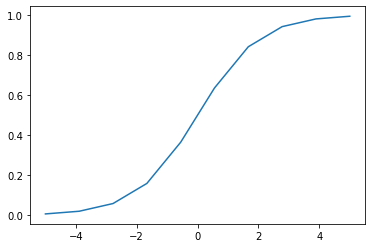

In [9]:
# Now we will plot this and see if we actually get the sigmoid curve or not?
# Also note you can select any variable name. I used "T", 
# you can use "X" to denote X-dataset containing those instances.

plt.plot(T, Y)

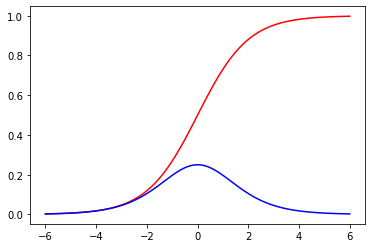

In [10]:
# Our sigmoid curve is in red and our derivatives curve is in blue

X = np.linspace(-6, 6, 100)
plt.plot(X, sigmoid(X), c="r")
plt.plot(X, derivatives(X), c="b")

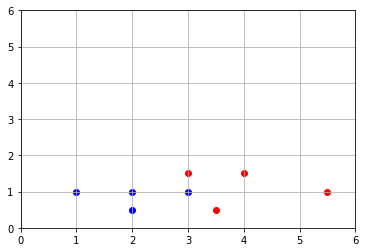

In [11]:
# Lets make a scatter plot of our data before we start to train our model
# So, we can observe if, it looks correct

plt.axis([0, 6, 0, 6])
plt.grid()

for i in range(len(data)):
    point = data[i]
    color = "r"
    if point[2] == 0:
        color = 'b'
    plt.scatter(point[0], point[1], c = color)

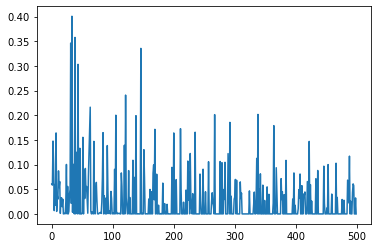

In [12]:
# Training Loop
# this training loop will perform following task
# loop over our data,            | 
# pick up any random point       | - This will become our Cost function
# run it through the network,    |
# see what it should have been   |

# Then we are going to take derivatives of our Cost w.r.t. out parameters
# use those derivatives of our Cost function to update our parameters (w & b)
# by subtracting it and that will decrese our cost value, which will help us
# improve our NN's prediction for that data point and if we we see enough
# data points our predictions will get better and better for that type of data
# This is the reson we say that bigger the training data - better the predictions
# of our M.L and A.I models.

# epochs = int(input("set the number of epochs (iterations): "))
learning_rate = 0.2
costs = []

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

for i in range(50000): # means our algorithm will have 50,000 epochs
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + b
    preds = sigmoid(z)
    
    target = point[2]
    cost = np.square(preds - target)
    
    dcost_preds = 2 * (preds - target)
    dpreds_dz = derivatives(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    dcost_dz = dcost_preds * dpreds_dz
    
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
    if i % 100 == 0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[ri]
            
            z = point[0] * w1 + point[1] * w2 + b
            preds = sigmoid(z)
    
            target = point[2]
            cost_sum = cost_sum + np.square(preds - target)
            
        costs.append(cost_sum/len(data))
    
plt.plot(costs)
    #     print('\n')

In [27]:
for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0] * w1 + point[1] * w2 + b
    preds = sigmoid(z)
    print("Predictions: ", preds)

[3, 1.5, 1]
Predictions:  0.7229886273557805
[2, 1, 0]
Predictions:  0.0005555130716084661
[4, 1.5, 1]
Predictions:  0.9996218296626862
[3, 1, 0]
Predictions:  0.36017375333763363
[3.5, 0.5, 1]
Predictions:  0.7944027192210559
[2, 0.5, 0]
Predictions:  0.00011986701454462035
[5.5, 1, 1]
Predictions:  0.999999945579321
[1, 1, 0]
Predictions:  5.48808669726976e-07


In [29]:
z = mystery_flower[0] * w1 + mystery_flower[1] * w2 + b
preds = sigmoid(z)

print("Our mystery flower belongs to class: ", preds)

Our mystery flower belongs to class:  0.9999448869497647


In [13]:
# Installinng gtts (short for Google Text to Speech) library, which is used to convert text into speech. 
# This GTTS library will help us generate the speech as the output of our Neural Network.

!pip install gtts

In [14]:
import os
from gtts import gTTS

In [15]:
red = "This is a red flower. Roses are red."
language = 'en'
output = gTTS(text=red, lang=language, slow=False)
output.save('red.mp3')

In [16]:
blue = "This is a blue flower. Voilets are blue."
language = 'en'
output = gTTS(text=blue, lang=language, slow=False)
output.save('blue.mp3')

In [19]:
def which_flower(length, width):
    z = length * w1 + width * w2 + b
    preds = sigmoid(z)
    if preds < 0.5:
        os.system("start blue.mp3")
        print('This is a blue flower. Voilets are blue.')
    else:
        os.system("start red.mp3")
        print("This is a red flower. Roses are red.")

In [20]:
which_flower(1, 1)

This is a blue flower. Voilets are blue.


In [21]:
which_flower(4.5, 1)

This is a red flower. Roses are red.
